##Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load Dataset

In [ ]:
df = pd.read_csv("/content/Heart Attack.csv")
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


#Review Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
df.shape

(1319, 9)

In [ ]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


#Cek Missing Value

In [ ]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

## Encode Variabel

In [ ]:
df.replace({'class':{'negative':0,'positive':1},},inplace=True)

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


<Axes: xlabel='gender', ylabel='count'>

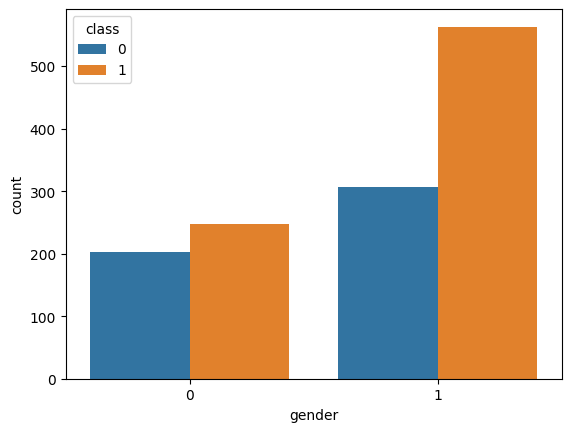

In [ ]:
sns.countplot(x='gender', hue='class', data=df)

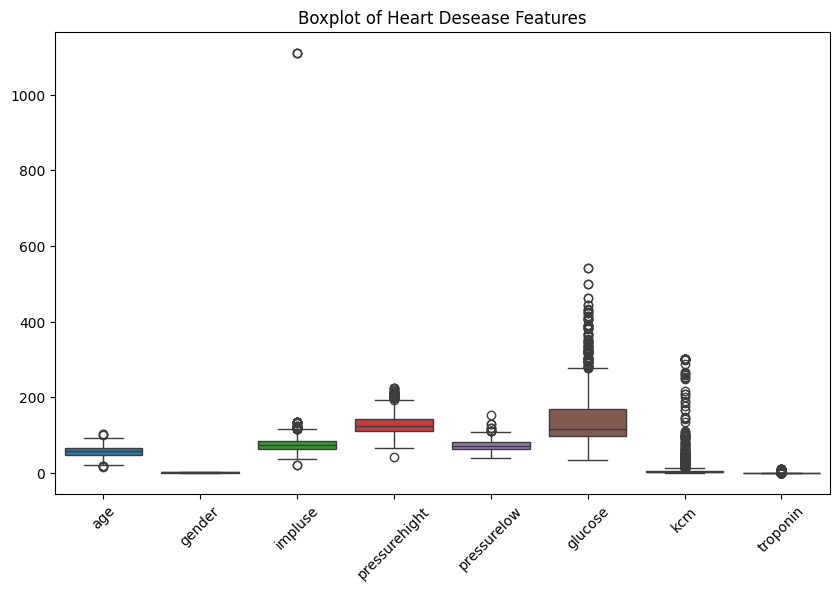

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Heart Desease Features")
plt.xticks(rotation=45)
plt.show()

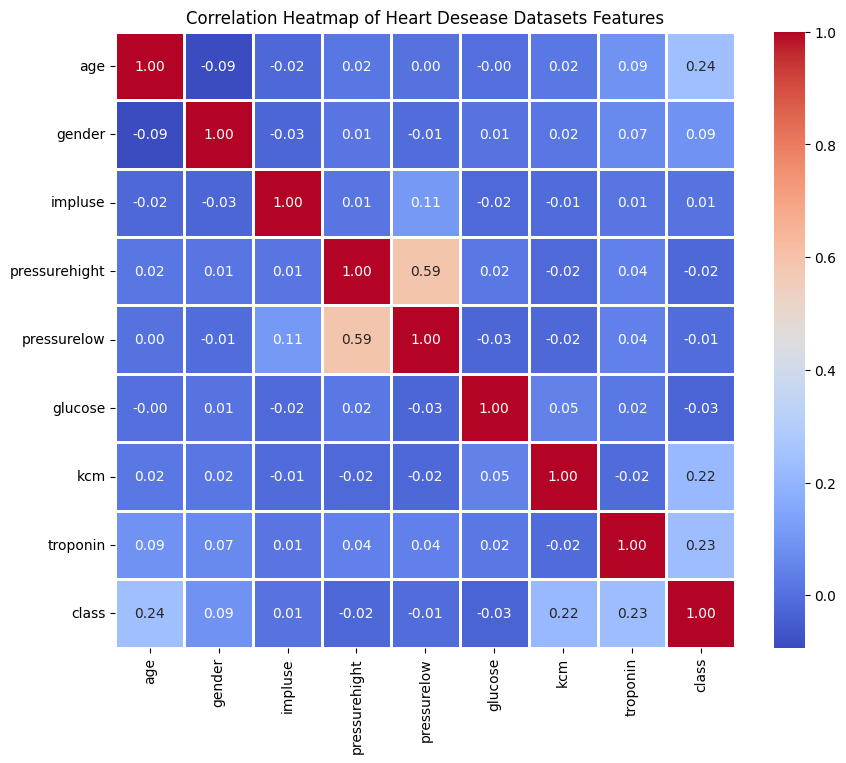

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Heart Desease Datasets Features')
plt.show()

#Dataset Splitting

In [ ]:
# separating the data and label
X = df.drop(columns=['class'],axis=1)
y = df['class']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1319, 8) (1055, 8) (264, 8)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[ 1.46264557  0.71971217 -0.10877187 ... -0.0428166   5.86217003
  -0.29105342]
 [-1.91633236 -1.38944433 -0.21401245 ... -0.7176701  -0.24527403
  -0.31003645]
 [-0.44721152  0.71971217 -0.31925303 ... -0.47948651 -0.27398362
  -0.30732458]
 ...
 [ 0.87499723 -1.38944433  0.08066117 ...  0.15566972 -0.30498165
  -0.240432  ]
 [ 0.65462911  0.71971217 -0.21401245 ...  0.698199   -0.16996338
  -0.30280482]
 [-0.07993131  0.71971217  0.10170928 ... -0.50595136 -0.29603591
  -0.29014946]]


In [ ]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.7310606060606061


In [ ]:
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       101
           1       0.75      0.84      0.79       163

    accuracy                           0.73       264
   macro avg       0.72      0.70      0.70       264
weighted avg       0.73      0.73      0.72       264



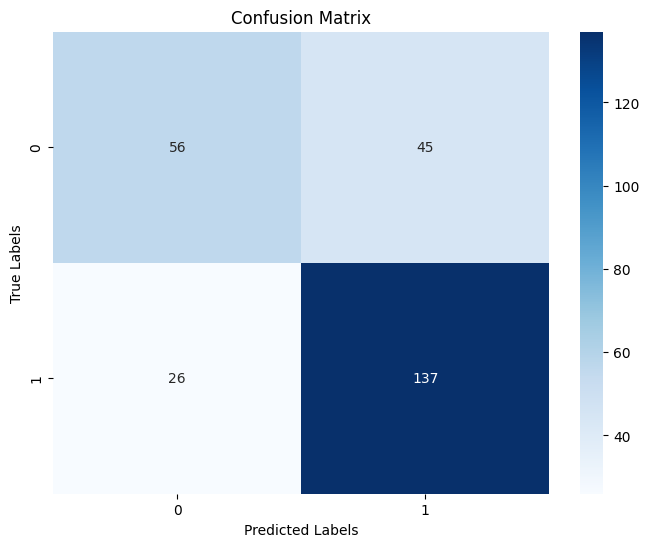

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


# Making a predictive system

In [ ]:
age = 64
gender = 0
impluse = 77
pressurehight = 176
pressurelow = 90
glucose = 194.5
kcm = 2.250
tropopin = 0.019

new_data = np.array([age,gender,impluse,pressurehight,pressurelow,glucose,kcm,tropopin])
new_data = new_data.reshape(1, -1)

predicted_label = svc.predict(new_data)
if predicted_label == 1:
  print("Penderita Penyakit jantung")
elif predicted_label == 0:
  print("Bukan Penderita Penyakit jantung")
else:
  print("Hasil Tidak diketahui")

Penderita Penyakit jantung
